In [19]:
import pandas as pd
import os
import numpy as np
import logging
import datetime
import json
import glob
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import FactorRange
output_notebook()

Loading BokehJS ...

In [3]:
#initialize dataframe
df = []

# create list of filenames from RawData folder, then iterate over that 
for root, dirs, files in os.walk("./RawData/", topdown=False):
    for name in files:
        filename = os.path.join(root, name)
        #print(filename[13:19])
        if filename[13:19] == 'Stream':
            file = open(filename, 'r')
            tmp = file.read()
            tmp = tmp.replace('}{', '}\n{')
            tmp = tmp.splitlines()
        #print(tmp[1])
            for record in tmp:
                rec = json.loads('{' + record[1:-1] + '}')
                #print(rec)
                df.append(rec)
        #tmp = pd.DataFrame(tmp)
        #print(tmp.head())
        
df = pd.DataFrame(df) 
df = df.astype(str)


#### Questions to answer:
* Which authors got the most traffic
* How much traffic comes from Facebook?
* Which sites get the most/least traffic?

In [36]:
df

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
0,1000669260.0,1513096820.0,BOLT,10/1/2017 2:03:58 PM,http://m.facebook.com,25493504,"Sun, 01 Oct 2017 20:03:00 GMT",Mozilla/5.0 (iPad; CPU OS 11_0_1 like Mac OS X...,734e59f0-c1da-4726-a9e7-14b334311227,Guest
1,2216099854.0,1678575220.0,BOLT,10/1/2017 2:45:00 PM,https://www.facebook.com/,24903680,"Sun, 01 Oct 2017 20:02:59 GMT",Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...,d6b4181e-7b37-4b9b-9e47-d618392a9c49,Guest
2,1294794764.0,685179682.0,542801,4/30/2017 6:39:14 PM,None,25100288,"Sun, 01 Oct 2017 20:03:01 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,fcff0e30-5f60-447a-a1c6-bbf1f310b476,Guest
3,2409889804.0,778241652.0,BOLT,10/1/2017 1:18:10 PM,http://m.facebook.com/,25493504,"Sun, 01 Oct 2017 20:02:40 GMT",Mozilla/5.0 (Linux; Android 5.0; SM-N900V Buil...,c175194c-6e21-4bd0-99fb-2403d9953391,Guest
4,2818048.0,2723480346.0,GALLERY,3/31/2017 11:14:00 AM,http://m.facebook.com,25165824,"Sun, 01 Oct 2017 20:03:01 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,b25ad2f0-a472-48f4-9594-4fac563bc7d8,Guest
5,2099970060.0,1664353908.0,CONTENTGALLERY,10/1/2017 2:03:58 PM,http://m.facebook.com/,25165824,"Sun, 01 Oct 2017 20:04:52 GMT",Mozilla/5.0 (Linux; Android 7.0; SAMSUNG-SM-G8...,925fce41-f01d-4d31-8726-d154cd847560,Guest
6,1000669260.0,1513096820.0,BOLT,10/1/2017 2:03:58 PM,http://m.facebook.com/,24838144,"Sun, 01 Oct 2017 20:03:21 GMT",Mozilla/5.0 (Linux; Android 7.0; SAMSUNG-SM-N9...,c4dbdde5-c42a-4eb9-a55b-002ef4cc8e31,Guest
7,1431109643.0,1052837492.0,CONTENTGALLERY,10/1/2017 11:45:38 AM,http://m.facebook.com,25624576,"Sun, 01 Oct 2017 20:02:55 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,e2de8c07-3c3f-4164-a760-2b42fc365b6b,Guest
8,2216099854.0,4127196787.0,BOLT,9/30/2017 11:24:02 PM,http://m.facebook.com,25231360,"Sun, 01 Oct 2017 20:02:58 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,da18acb3-0f27-49ed-aaed-90bef9826a97,Guest
9,2409889804.0,1582826283.0,GALLERY,6/14/2017 12:10:12 PM,http://m.facebook.com/,24248320,"Sun, 01 Oct 2017 20:03:00 GMT",Mozilla/5.0 (Linux; Android 5.1.1; VS425PP Bui...,0f6b5200-6bc3-4abf-8b1f-61df00957234,Guest


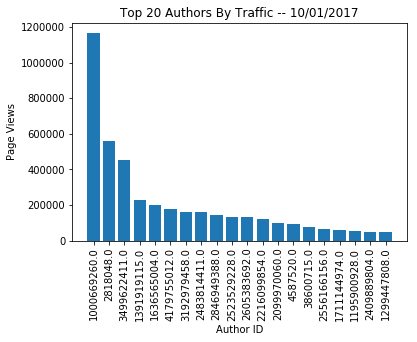

In [60]:
#Which authors got the most traffic?
top_20_authors = df.authorKey.value_counts().head(20).reset_index().rename(columns={'index': 'authorKey', 'authorKey': 'count'})

x_pos = np.arange(len(top_20_authors['authorKey']))

plt.bar(x_pos, top_20_authors['count'])
plt.xticks(x_pos, top_20_authors['authorKey'], rotation = 'vertical')
plt.xlabel('Author ID')
plt.ylabel('Page Views')
plt.title('Top 20 Authors By Traffic -- 10/01/2017')
plt.show()

In [59]:
#How much traffic came from Facebook?
referrers = df.referrer.unique()
facebook_traffic = df[df.referrer.str.contains('facebook')]
print(facebook_traffic.shape[0]/df.shape[0]*100, '%')

88.77636059931889 %


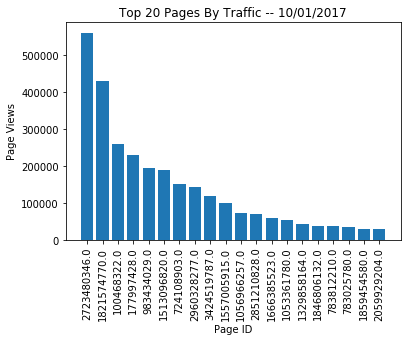

In [61]:
#Which pages got the most traffic?
top_20_pages = df.contentKey.value_counts().head(20).reset_index().rename(columns={'index': 'contentKey', 'contentKey': 'count'})

x_pos = np.arange(len(top_20_pages['contentKey']))

plt.bar(x_pos, top_20_pages['count'])
plt.xticks(x_pos, top_20_pages['contentKey'], rotation = 'vertical')
plt.xlabel('Page ID')
plt.ylabel('Page Views')
plt.title('Top 20 Pages By Traffic -- 10/01/2017')
plt.show()

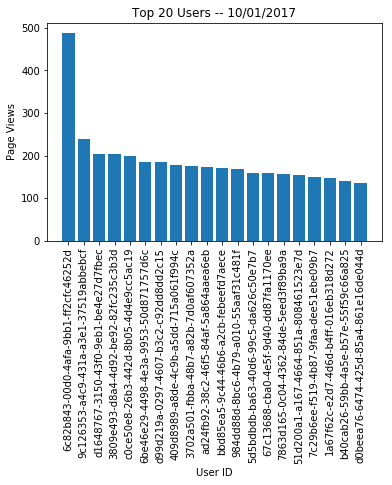

In [64]:
#Which users visited the most?
top_20_users = df.userId.value_counts().head(20).reset_index().rename(columns={'index': 'userId', 'userId': 'count'})

x_pos = np.arange(len(top_20_users['userId']))

plt.bar(x_pos, top_20_users['count'])
plt.xticks(x_pos, top_20_users['userId'], rotation = 'vertical')
plt.xlabel('User ID')
plt.ylabel('Page Views')
plt.title('Top 20 Users -- 10/01/2017')
plt.show()